In [4]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [5]:
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)



In [4]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)




compilation time :  0.03637504577636719


Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s 2ms/step - loss: 0.0032 - val_loss: 8.8982e-04
yo


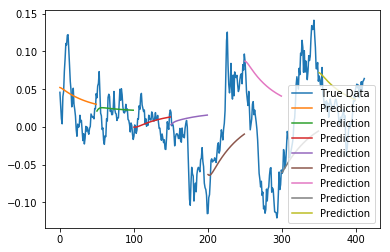

In [5]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)




predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

## Things yet to be done


* select  around 50 stocks according to the group of industries they belong to Ex.. Banking, telecom, financial institution
* Compare the Groups using T test method
* Comapare the ARIMA forecasted values and LSTM forecasted values 
* Build a protfolio of 5 to10 stocks  that would make the highest forecasted return.

## Building the LSTM model
* Introduce Xavier initialisation for weight assignment
* Try and evaluate differnet optimiser( Gradient descent values)
* Hyperperameter Tuning (selecting the number of layers for avoiding overfitting and underfitting) 